In [321]:
import os

In [322]:
import pandas as pd

In [323]:
import numpy as np

In [324]:
import seaborn as sns

In [325]:
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
# from sklearn.linear_model import LogisticRegression

# Load data

In [327]:
pwd

'/home/ihor/anaconda_src/ks-challenge/src/main/resources/data'

In [328]:
cd "../resources/data/"

[Errno 2] No such file or directory: '../resources/data/'
/home/ihor/anaconda_src/ks-challenge/src/main/resources/data


In [669]:
#load dataset
tabular_data = pd.read_csv('tabular_data.csv')
#tabular_data.head(10)
print("******* train.csv report *******")
print('Shape: ', tabular_data.shape)
print('Shape w/o NaN: ', tabular_data.dropna(how='any').shape)
print('rows {:d}, unique ids: {:d}'.format(tabular_data.shape[0], tabular_data.id.nunique()))

******* train.csv report *******
Shape:  (61272, 52)
Shape w/o NaN:  (21184, 52)
rows 61272, unique ids: 5106


In [674]:
tabular_data.columns

Index(['id', 'period', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49'],
      dtype='object')

In [675]:
ids = ['id', 'period']

In [331]:
tabular_data

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,5105,8,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,-0.00,0,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0
61268,5105,9,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,1.75,0,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0
61269,5105,10,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,8.27,0,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0
61270,5105,11,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,0.00,0,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0


In [332]:
#load train data
train = pd.read_csv('train.csv')
train.head(10)

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,0


In [333]:
print("******* train.csv report *******")
print('rows {:d}, unique ids: {:d}, unique targets {:d}'.format(train.shape[0], train.id.nunique(), train.target.nunique()))
print('NaN count:')
print(train.isna().sum())
val_counts = train.target.value_counts()
print('Target value counts:\n', val_counts)
print('Class_1 probability = ', val_counts[1] / val_counts.sum())

******* train.csv report *******
rows 4084, unique ids: 4084, unique targets 2
NaN count:
id        0
target    0
dtype: int64
Target value counts:
 0    3009
1    1075
Name: target, dtype: int64
Class_1 probability =  0.26322233104799214


# Cleaning and formatting

### Encode object values (feature_25)

In [722]:
df_to_encode = tabular_data
print('Object features:')
features_to_encode = df_to_encode.dtypes[df_to_encode.dtypes == 'O'].drop(columns=ids).index
features_to_encode

Object features:


Index(['feature_25'], dtype='object')

In [728]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#NaN should be encoded as another value
for feature in features_to_encode:
    encoded_data[feature + "_encoded"] = le.fit_transform(df_to_encode[feature].fillna('__NaN__'))
    print(feature + " has been encoded")
encoded_data = encoded_data.drop(columns=features_to_encode, errors='ignore')   
# encoded_data

feature_25 has been encoded


### Delete splashes

In [627]:
df = pd.DataFrame(columns=['a'], data=[-0.5, 1,1,np.nan,1,1,1,1,1,1,2,1,1,1,1,1,1])
df = df.join(pd.DataFrame(columns=['b'], data=[1, 1,0.999,1,np.nan,1,1,1,1,1,1,1,1,1,1,2,1]))
df = df.reset_index()
print(df.quantile(q=0.90, interpolation='linear'))
# df[~df['index'].isna()]
df2 = df[df.columns.drop(['index'])]
margin = 0.05
print("\nColumns to delete:")
print(pd.DataFrame( (df2.quantile(q=1-margin, interpolation='higher') == df2.quantile(q=margin, interpolation='lower')) | 
              (df2.quantile(q=1-2*margin, interpolation='higher') == df2.min()) | 
              (df2.quantile(q=2*margin, interpolation='lower') == df2.max()) ))
report = pd.DataFrame({'mean':df2.mean(), 'std':df2.std()})
report['m_left'] = report['mean'] - 3*report['std']
report['m_right'] = report['mean'] + 3*report['std']
print("\n", report)
df2[ (df2 > report['m_left']) & (df2 < report['m_right']) ]

index    14.4
a         1.0
b         1.0
Name: 0.9, dtype: float64

Columns to delete:
       0
a  False
b  False

        mean       std    m_left   m_right
a  0.968750  0.464354 -0.424313  2.361813
b  1.062438  0.250017  0.312387  1.812488


,a,b
0,NaN,1.000
1,1.0,1.000
2,1.0,0.999
3,NaN,1.000
4,1.0,NaN
5,1.0,1.000
6,1.0,1.000
7,1.0,1.000
8,1.0,1.000
9,1.0,1.000


In [758]:
margin = 0.1
splashed_data = encoded_data
unsplashed_data = splashed_data[splashed_data.columns.drop(['id', 'period'])]
mean_std = pd.DataFrame({'mean':splashed_data.mean(), 'std':splashed_data.std()})
mean_std['m_left'] = mean_std['mean'] - 3*mean_std['std']
mean_std['m_right'] = mean_std['mean'] + 3*mean_std['std']
unsplashed_data = splashed_data[{'id', 'period'}] \
    .join(unsplashed_data[ (unsplashed_data > mean_std['m_left']) & (unsplashed_data < mean_std['m_right']) ])
unsplashed_data

,period,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_25_encoded
0,1,0,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,NaN,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0,7
1,2,0,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,NaN,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0,7
2,3,0,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,NaN,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0,7
3,4,0,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,NaN,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0,7
4,5,0,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,NaN,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,8,5105,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,NaN,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0,3
61268,9,5105,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,NaN,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0,3
61269,10,5105,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,NaN,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0,3
61270,11,5105,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,NaN,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0,3


In [495]:
#TIME CONSUMING! (because of nunique)
#count uniques and check for data types
#NaN is not unique value!
#Look for object - it's categorial, so should be converted to dummies
tabular_data_report = pd.DataFrame({'dtypes':cleaned_data.dtypes,
                                    'nunique':cleaned_data.nunique(), 
                                    'nan_count':cleaned_data.isna().sum(),
                                    '5%':cleaned_data.quantile(q=0.01),
                                    '90%':cleaned_data.quantile(q=0.90),
                                    '95%':cleaned_data.quantile(q=0.95),
                                    '99%':cleaned_data.quantile(q=0.99)
                                   })
tabular_data_report = tabular_data_report.join(cleaned_data.describe().transpose()) \
    .drop(['id', 'period'])
tabular_data_report

,dtypes,nunique,nan_count,5%,90%,95%,99%,count,mean,std,min,25%,50%,75%,max
feature_1,float64,10233,2892,0.000000,168.537000,223.500000,365.272500,58380.0,87.142409,95.507541,-4.250000,45.000000,75.000000,114.000000,7989.000000
feature_2,float64,55114,3477,0.003359,0.482802,0.592654,5.240662,57795.0,0.305150,0.746314,0.000000,0.059522,0.147504,0.321111,5.474424
feature_3,float64,32636,2958,0.000000,7098.062835,13895.518698,46300.990313,58314.0,3003.454276,11218.392268,0.000000,0.000000,10.898701,1809.999746,557998.502178
feature_4,float64,34599,2847,0.000000,1001.750000,1376.566000,2404.006800,58425.0,414.703826,524.216185,0.000000,70.320000,254.950000,566.530000,10335.280000
feature_5,float64,11468,3015,0.000000,2196.969952,7237.541826,33699.352492,58257.0,1466.527398,7356.174585,0.000000,0.000000,0.000000,0.000000,334448.528357
feature_6,float64,56466,3458,0.003676,0.901157,0.984766,5.254601,57814.0,0.576053,0.738444,0.000002,0.247418,0.492813,0.698059,5.499928
feature_7,float64,34986,2992,0.000000,908.720000,1209.101000,2003.978500,58280.0,391.127914,436.314898,0.000000,99.295000,262.430000,535.162500,7950.650000
feature_8,float64,1391,2934,-218.000000,291.000000,378.000000,601.630000,58338.0,125.101255,145.203774,-1755.000000,39.000000,100.000000,184.000000,1762.000000
feature_9,float64,8545,2928,0.000000,69.350000,125.009500,4735.420107,58344.0,114.737443,661.855299,0.000000,0.000000,3.450000,23.300000,4954.493685
feature_10,float64,33635,2954,0.000000,955.245000,1327.696000,2352.803100,58318.0,388.728984,512.211932,0.000000,54.740000,226.960000,529.122500,10302.850000


### Delete nonsignificants columns

In [472]:
print("Nonsignificant features (over 90% have same value)")
tabular_data_report[tabular_data_report['90%'] == tabular_data_report['min']]
# tabular_data_report[tabular_data_report['10%'] == tabular_data_report['max']]

Nonsignificant features (over 90% have same value)


,dtypes,nunique,nan_count,1%,99%,90%,95%,count,mean,std,min,25%,50%,75%,max


In [473]:
#delete nonsignificant: 
cleaned_data = cleaned_data.drop(columns=['feature_0', 'feature_37', 'feature_38', 'feature_41'], errors='ignore')

In [434]:
#stub for export to Excel
#Excel requires ";" separator
#tabular_data_report.to_csv('tabular_data_report.csv', index=True)

### Merge with train data

In [435]:
#merge train data to dataset
targeted_data = pd.merge(cleaned_data, train, how='left', on='id')

### Combine correlated columns (input: cleaned_data)

In [436]:
#calculate Pearson correlations
data_corr = targeted_data[targeted_data.target.isna() != True].corr(method='pearson')

In [437]:
#print the most correlated pairs 
margin = 0.8
correlation_report = pd.DataFrame(columns=['column_a', 'column_b', 'column_a_index', 'column_b_index',
                                          'correlation', 'a_nans_count', 'b_nans_count', 'both_is_nan_count'])
for r in range(1, data_corr.shape[0]-1):
    for c in range(0, r-1):
        if (data_corr.iloc[r][c] > margin) or (data_corr.iloc[r][c] < -margin):
            print(data_corr.columns[c], "=", data_corr.columns[r], 
                  ' (columns {:d}:{:d}, correlation={:.3f})'.format(c, r, data_corr.iloc[r][c]))
            correlation_report = correlation_report.append({
                'column_a':data_corr.columns[c],
                'column_b':data_corr.columns[r],
                'column_a_index':c,
                'column_b_index':r,
                'correlation':data_corr.iloc[r][c],
#                 'both_is_nan_count':targeted_data.iloc[:, r].isna().combine(targeted_data.iloc[:, c].isna(), 
#                                                                      lambda s1, s2: s1 and s2).sum(),
                'a_nans_count':targeted_data.iloc[:, c].isna().sum(),
                'b_nans_count':targeted_data.iloc[:, r].isna().sum()
                }, ignore_index=True)
print("Completed")
#' both is NaN:', 

feature_4 = feature_10  (columns 5:11, correlation=0.996)
feature_7 = feature_18  (columns 8:19, correlation=0.993)
feature_14 = feature_24  (columns 15:25, correlation=0.835)
feature_26 = feature_30  (columns 27:31, correlation=0.991)
feature_26 = feature_32  (columns 27:33, correlation=0.825)
feature_30 = feature_32  (columns 31:33, correlation=0.834)
feature_19 = feature_33  (columns 20:34, correlation=-0.887)
feature_4 = feature_36  (columns 5:37, correlation=0.915)
feature_10 = feature_36  (columns 11:37, correlation=0.921)
feature_20 = feature_44  (columns 21:42, correlation=1.000)
feature_8 = feature_47  (columns 9:45, correlation=0.802)
feature_4 = feature_48  (columns 5:46, correlation=0.985)
feature_10 = feature_48  (columns 11:46, correlation=0.989)
feature_36 = feature_48  (columns 37:46, correlation=0.851)
Completed


In [438]:
correlation_report.sort_values(by='correlation')

,column_a,column_b,column_a_index,column_b_index,correlation,a_nans_count,b_nans_count,both_is_nan_count
6,feature_19,feature_33,20,34,-0.886870,3564,3778,NaN
10,feature_8,feature_47,9,45,0.802164,2934,2854,NaN
4,feature_26,feature_32,27,33,0.824922,2668,3002,NaN
5,feature_30,feature_32,31,33,0.833727,2815,3002,NaN
2,feature_14,feature_24,15,25,0.835141,2906,2951,NaN
13,feature_36,feature_48,37,46,0.850897,2827,2904,NaN
7,feature_4,feature_36,5,37,0.914574,2847,2827,NaN
8,feature_10,feature_36,11,37,0.921176,2954,2827,NaN
11,feature_4,feature_48,5,46,0.985121,2847,2904,NaN
12,feature_10,feature_48,11,46,0.988586,2954,2904,NaN


In [439]:
#most correlated features are:
#20-44
#7-18
#26-30
#4-10-48(-36)

In [440]:
#procedure combine two features with imputation of skipped values
#shrinks result to mean and standard deviation of feature1
# df - input/output dataframe
# feature1, feature2 - string name of features to combine
# combined_feature_name - string name of new combined column
# feature1_weight - weight of feature1
# correlation_sign - -1 if feature2 has opposite sign; 1 otherwise
def combine_na(df, feature1, feature2, combined_feature_name, feature1_weight=0.5, correlation_sign=1):
    #calculate means and standard deviation for both non-null values
    df_f1_f2 = df[{feature1, feature2}].dropna()
    f1_mean = df_f1_f2[feature1].mean()
    f1_std = df_f1_f2[feature1].std() 
    f2_mean = df_f1_f2[feature2].mean()
    f2_std = df_f1_f2[feature2].std() 
    f1_f2_ratio = correlation_sign * f1_std / f2_std

    f2_shrinked = feature2 + '_shrinked_to_' + feature1
    d_f2_shrinked = df[feature2].add(-f2_mean).mul(f1_f2_ratio).add(f1_mean)
    df[combined_feature_name] = (
        ((df[feature1] + d_f2_shrinked) / 2)
        .mask(pd.isnull, df[feature1])
        .mask(pd.isnull, d_f2_shrinked)
    )

In [441]:
#combine 'feature_20', 'feature_44'
combine_na(targeted_data, 'feature_20', 'feature_44', 'feature_20_44')
targeted_data = targeted_data.drop(columns=['feature_20', 'feature_44'], errors='ignore')

In [442]:
#combine 'feature_7', 'feature_18'
combine_na(targeted_data, 'feature_7', 'feature_18', 'feature_7_18')
targeted_data = targeted_data.drop(columns=['feature_7', 'feature_18'], errors='ignore')

In [443]:
#combine 'feature_26', 'feature_30'
combine_na(targeted_data, 'feature_26', 'feature_30', 'feature_26_30')
targeted_data = targeted_data.drop(columns=['feature_26', 'feature_30'], errors='ignore')

In [444]:
#combine 4-10-48-36
combine_na(targeted_data, 'feature_4', 'feature_10', 'feature_4_10')
combine_na(targeted_data, 'feature_4_10', 'feature_48', 'feature_4_10_48', 0.67)
combine_na(targeted_data, 'feature_4_10_48', 'feature_36', 'feature_4_10_48_36', 0.75)
# cleaned_data[{'feature_4', 'feature_10', 'feature_36', 'feature_48', 'feature_4_10', 'feature_4_10_48'}].head(40)
targeted_data = targeted_data.drop(columns=['feature_4', 'feature_10', 'feature_36', 
                                            'feature_48', 'feature_4_10', 'feature_4_10_48'], errors='ignore')

In [445]:
targeted_data.columns

Index(['id', 'period', 'feature_1', 'feature_2', 'feature_3', 'feature_5',
       'feature_6', 'feature_8', 'feature_9', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_19', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_27', 'feature_28', 'feature_29', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_39',
       'feature_40', 'feature_42', 'feature_43', 'feature_45', 'feature_46',
       'feature_47', 'feature_49', 'target', 'feature_20_44', 'feature_7_18',
       'feature_26_30', 'feature_4_10_48_36'],
      dtype='object')

In [446]:
print('Before combining:')
print('Shape: ', tabular_data.shape)
print('Shape w/o NaN: ', tabular_data.dropna(how='any').shape)
print('\nAfter combining:')
print('Shape: ', targeted_data.shape)
print('Shape w/o NaN: ', targeted_data.dropna(how='any').shape)

Before combining:
Shape:  (61272, 52)
Shape w/o NaN:  (21184, 52)

After combining:
Shape:  (61272, 43)
Shape w/o NaN:  (21470, 43)


### Clean categorical features

In [447]:
#suppose categorical if
# object type
# numeric type and...
#   few uniques
#   significant class1 distribution between adjacent values
# it should treat NaN as another value if class1 probability for NaNs is different to mean that of (0.263) 

In [448]:
targeted_data.columns

Index(['id', 'period', 'feature_1', 'feature_2', 'feature_3', 'feature_5',
       'feature_6', 'feature_8', 'feature_9', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_19', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_27', 'feature_28', 'feature_29', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_39',
       'feature_40', 'feature_42', 'feature_43', 'feature_45', 'feature_46',
       'feature_47', 'feature_49', 'target', 'feature_20_44', 'feature_7_18',
       'feature_26_30', 'feature_4_10_48_36'],
      dtype='object')

In [449]:
print("Candidates to categorical features")
tabular_data_report.sort_values('nunique').head(10) \
    .drop(tabular_data_report.index.difference(targeted_data.columns), errors='ignore')

Candidates to categorical features


,dtypes,nunique,nan_count,5%,10%,90%,95%,count,mean,std,min,25%,50%,75%,max
feature_25,int64,8,0,0.0,2.0,7.0,7.0,61272.0,5.110311,2.458646,0.0,3.0,7.0,7.0,7.0
feature_43,float64,32,3054,0.0,0.0,3.0,6.0,58218.0,1.092617,2.989411,0.0,0.0,0.0,1.0,31.0
feature_15,float64,63,2862,0.0,0.0,30.0,31.0,58410.0,10.821589,14.111705,-31.0,0.0,2.0,27.0,31.0
feature_14,float64,260,2906,0.0,0.0,4.0,11.0,58366.0,3.155639,24.529224,0.0,0.0,0.0,1.0,2228.0
feature_45,float64,261,2965,0.0,0.0,33.0,52.0,58307.0,12.617404,22.794809,0.0,1.0,5.0,14.0,504.0
feature_24,float64,272,2951,0.0,0.0,4.0,10.0,58321.0,3.099158,24.016987,0.0,0.0,0.0,1.0,1580.0
feature_34,float64,456,2885,-1.0,10.0,169.0,179.0,58387.0,86.755117,70.676962,-227.0,43.0,79.0,149.0,234.0
feature_23,float64,470,3099,0.0,0.0,71.0,94.0,58173.0,27.880013,37.923651,-300.0,4.0,19.0,42.0,902.0
feature_47,float64,883,2854,2.0,10.0,274.0,354.0,58418.0,125.407494,123.970687,0.0,39.0,94.0,173.0,1724.0


In [450]:
#probably categorical features (name, type, number of uniques, number of NaNs):
#feature_15, float64, 63, 2862
#feature_25, object, 8, 0
#feature_43, float64, 32, 3054
categoricalFeatures = ['feature_15', 'feature_25', 'feature_43']

In [451]:
nonCategoricalFeatures = (
    targeted_data.columns
    .drop(categoricalFeatures)
    .drop(['id', 'period', 'target'])
    .array
)
nonCategoricalFeatures

<PandasArray>
[         'feature_1',          'feature_2',          'feature_3',
          'feature_5',          'feature_6',          'feature_8',
          'feature_9',         'feature_11',         'feature_12',
         'feature_13',         'feature_14',         'feature_16',
         'feature_17',         'feature_19',         'feature_21',
         'feature_22',         'feature_23',         'feature_24',
         'feature_27',         'feature_28',         'feature_29',
         'feature_31',         'feature_32',         'feature_33',
         'feature_34',         'feature_35',         'feature_39',
         'feature_40',         'feature_42',         'feature_45',
         'feature_46',         'feature_47',         'feature_49',
      'feature_20_44',       'feature_7_18',      'feature_26_30',
 'feature_4_10_48_36']
Length: 37, dtype: object

In [452]:
def print_categorical_report(df, feature):
    total_count = 0
    for i in df[feature].unique():
        if pd.isna(i):
            continue
        total = df[df[feature] == i].shape[0]
        class1 = (df[df[feature] == i].target == 1).sum()
        
        class0 = (df[df[feature] == i].target == 0).sum()
        print(i, ': ', total, ' target 1_0 ratio: ', class1, class0, class1/class0)
        total_count += class1 + class0
    class1 = (df[df[feature].isna()].target == 1).sum()
    class0 = (df[df[feature].isna()].target == 0).sum()
    total_count += class1 + class0
    print('NaN: ', df[df[feature].isna()].shape[0], 
          ' target 1_0 ratio: ', class1, class0, class1/class0 if class0 != 0 else np.nan)
#     print(total_count)
#     print((~df.target.isna()).sum())

In [453]:
print_categorical_report(targeted_data, 'feature_15')

0.0 :  25070  target 1_0 ratio:  4500 15484 0.2906225781451821
21.0 :  584  target 1_0 ratio:  123 351 0.3504273504273504
18.0 :  500  target 1_0 ratio:  129 270 0.4777777777777778
2.0 :  920  target 1_0 ratio:  195 538 0.362453531598513
9.0 :  455  target 1_0 ratio:  98 258 0.3798449612403101
11.0 :  477  target 1_0 ratio:  112 283 0.3957597173144876
30.0 :  4899  target 1_0 ratio:  1240 2679 0.46285927584919745
31.0 :  5713  target 1_0 ratio:  1507 3079 0.4894446248782072
28.0 :  1925  target 1_0 ratio:  495 1047 0.47277936962750716
-28.0 :  103  target 1_0 ratio:  31 58 0.5344827586206896
22.0 :  651  target 1_0 ratio:  143 356 0.40168539325842695
-29.0 :  82  target 1_0 ratio:  21 45 0.4666666666666667
5.0 :  504  target 1_0 ratio:  112 299 0.3745819397993311
19.0 :  555  target 1_0 ratio:  128 316 0.4050632911392405
7.0 :  473  target 1_0 ratio:  96 301 0.31893687707641194
27.0 :  1101  target 1_0 ratio:  285 613 0.46492659053833607
29.0 :  1626  target 1_0 ratio:  371 918 0.40413

Text(0, 0.5, 'Flights')

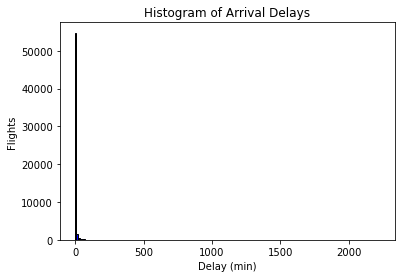

In [454]:
df = targeted_data['feature_14']

plt.hist(df, color = 'blue', edgecolor = 'black',
         bins = df.nunique())

# seaborn histogram
# sns.distplot(df, hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [455]:
df[df == 110].count() / df.size

4.896200548374461e-05

In [456]:
df.isna().sum()

2906

In [457]:
df.size

61272

In [458]:
df = targeted_data[{'feature_0', 'feature_25'}]
df.agg(max)


KeyError: "['feature_0'] not in index"

In [ ]:
df = targeted_data['feature_17'].nunique()

In [ ]:
targeted_data.columns.drop(['id'])

### Analyze density

In [ ]:
#merge with train data
# cleaned_data = pd.merge(cleaned_data, train, how='left', on='id')

In [ ]:
# cleaned_data = cleaned_data.drop(columns=['target_x','target_y'])
# targeted_data

In [ ]:
np.nanmin(targeted_data.feature_0.unique()) > 0

In [ ]:
targeted_data.feature_0.dtype == 'float'

In [ ]:
targeted_data.feature_15[targeted_data.feature_15 == 0].count()

In [ ]:
targeted_data[categoricalFeatures]

### Visualize target distribution

In [ ]:
#replace feature_25 with dummies
#There is no NaNs 
feature_25_vals = pd.DataFrame({'feature_25':tabular_data.feature_25.unique()})
#add dummies
# feature_25_vals = feature_25_vals.reset_index().rename(columns = {'index':'feature_25_index'})
feature_25_vals = feature_25_vals.combine_first(pd.get_dummies(feature_25_vals.index, prefix='feature_25'))
#feature_25_vals

In [ ]:
#merge feature_25 dummies
cleaned_data = pd.merge(cleaned_data, feature_25_vals, how = 'left', on='feature_25')
#delete feature_25
cleaned_data = cleaned_data.drop(columns=['feature_25'], errors='ignore')
# cleaned_data